<a href="https://colab.research.google.com/github/SJhawar1010/Deep-Learning/blob/main/2348554_DL_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
train_path = '/content/drive/MyDrive/DL Datasets/Skin/train'
test_path = '/content/drive/MyDrive/DL Datasets/Skin/test'

In [8]:
# Image data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Define image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [10]:
# Prepare training data generator
train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='binary')

# Prepare test data generator
test_generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=(img_width, img_height),
                                                  batch_size=batch_size,
                                                  class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [11]:
# Custom CNN model
custom_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [12]:
# VGG16 model with ImageNet weights
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Add fully connected layers on top of VGG16
vgg16_model = Sequential([
    vgg16,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
# VGG19 model with ImageNet weights
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning VGG19 model
for layer in vgg19.layers:
    layer.trainable = False

# Add fully connected layers on top of VGG19
vgg19_model = Sequential([
    vgg19,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

80134624/80134624 [==============================] - 1s 0us/step


In [14]:
custom_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg19_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
custom_cnn_history = custom_cnn.fit(train_generator,
                                    steps_per_epoch=train_generator.samples // batch_size,
                                    epochs=10,
                                    validation_data=test_generator,
                                    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
82/82 [==============================] - 691s 8s/step - loss: 0.6114 - accuracy: 0.6541 - val_loss: 0.6816 - val_accuracy: 0.4578
Epoch 2/10
82/82 [==============================] - 179s 2s/step - loss: 0.5487 - accuracy: 0.7263 - val_loss: 0.5089 - val_accuracy: 0.7266
Epoch 3/10
82/82 [==============================] - 182s 2s/step - loss: 0.4473 - accuracy: 0.7858 - val_loss: 0.4193 - val_accuracy: 0.7766
Epoch 4/10
82/82 [==============================] - 176s 2s/step - loss: 0.4487 - accuracy: 0.7889 - val_loss: 0.4363 - val_accuracy: 0.7828
Epoch 5/10
82/82 [==============================] - 177s 2s/step - loss: 0.4621 - accuracy: 0.7731 - val_loss: 0.3977 - val_accuracy: 0.8000
Epoch 6/10
82/82 [==============================] - 177s 2s/step - loss: 0.4152 - accuracy: 0.7996 - val_loss: 0.3817 - val_accuracy: 0.8094
Epoch 7/10
82/82 [==============================] - 169s 2s/step - loss: 0.4285 - accuracy: 0.7919 - val_loss: 0.4348 - val_accuracy: 0.7563
Epoch 8/10
82

In [17]:
vgg16_history = vgg16_model.fit(train_generator,
                                steps_per_epoch=train_generator.samples // batch_size,
                                epochs=10,
                                validation_data=test_generator,
                                validation_steps=test_generator.samples // batch_size)

Epoch 1/10
82/82 [==============================] - 830s 10s/step - loss: 0.5661 - accuracy: 0.7301 - val_loss: 0.4445 - val_accuracy: 0.8016
Epoch 2/10
82/82 [==============================] - 773s 9s/step - loss: 0.4141 - accuracy: 0.8192 - val_loss: 0.3989 - val_accuracy: 0.8203
Epoch 3/10
82/82 [==============================] - 825s 10s/step - loss: 0.3848 - accuracy: 0.8188 - val_loss: 0.3704 - val_accuracy: 0.8297
Epoch 4/10
82/82 [==============================] - 771s 9s/step - loss: 0.3863 - accuracy: 0.8119 - val_loss: 0.3937 - val_accuracy: 0.8156
Epoch 5/10
82/82 [==============================] - 825s 10s/step - loss: 0.3617 - accuracy: 0.8250 - val_loss: 0.3543 - val_accuracy: 0.8344
Epoch 6/10
82/82 [==============================] - 831s 10s/step - loss: 0.3679 - accuracy: 0.8230 - val_loss: 0.3619 - val_accuracy: 0.8375
Epoch 7/10
82/82 [==============================] - 774s 9s/step - loss: 0.3491 - accuracy: 0.8349 - val_loss: 0.3871 - val_accuracy: 0.8219
Epoch 8/1

In [18]:
vgg19_history = vgg19_model.fit(train_generator,
                                steps_per_epoch=train_generator.samples // batch_size,
                                epochs=10,
                                validation_data=test_generator,
                                validation_steps=test_generator.samples // batch_size)

Epoch 1/10
82/82 [==============================] - 988s 12s/step - loss: 0.6712 - accuracy: 0.6737 - val_loss: 0.4382 - val_accuracy: 0.7859
Epoch 2/10
82/82 [==============================] - 971s 12s/step - loss: 0.4652 - accuracy: 0.7724 - val_loss: 0.3980 - val_accuracy: 0.8125
Epoch 3/10
82/82 [==============================] - 955s 12s/step - loss: 0.4238 - accuracy: 0.8081 - val_loss: 0.3935 - val_accuracy: 0.8000
Epoch 4/10
82/82 [==============================] - 974s 12s/step - loss: 0.4017 - accuracy: 0.8123 - val_loss: 0.4159 - val_accuracy: 0.8000
Epoch 5/10
82/82 [==============================] - 972s 12s/step - loss: 0.3883 - accuracy: 0.8161 - val_loss: 0.3633 - val_accuracy: 0.8156
Epoch 6/10
82/82 [==============================] - 975s 12s/step - loss: 0.3684 - accuracy: 0.8207 - val_loss: 0.3520 - val_accuracy: 0.8313
Epoch 7/10
82/82 [==============================] - 967s 12s/step - loss: 0.3884 - accuracy: 0.8165 - val_loss: 0.3605 - val_accuracy: 0.8297
Epoch 

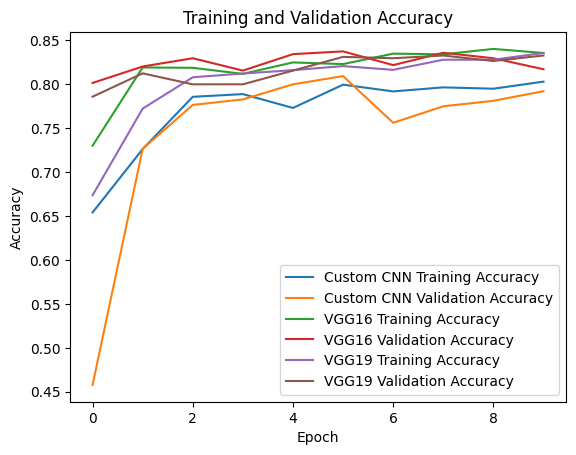

In [19]:
plt.plot(custom_cnn_history.history['accuracy'], label='Custom CNN Training Accuracy')
plt.plot(custom_cnn_history.history['val_accuracy'], label='Custom CNN Validation Accuracy')
plt.plot(vgg16_history.history['accuracy'], label='VGG16 Training Accuracy')
plt.plot(vgg16_history.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.plot(vgg19_history.history['accuracy'], label='VGG19 Training Accuracy')
plt.plot(vgg19_history.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [20]:
custom_cnn.evaluate(test_generator)

21/21 [==============================] - 12s 557ms/step - loss: 0.3811 - accuracy: 0.7970


[0.3810758590698242, 0.7969697117805481]

In [ ]:
# Evaluate VGG16 model
vgg16_model.evaluate(test_generator)

In [ ]:
# Evaluate VGG19 model
vgg19_model.evaluate(test_generator)

In [23]:
custom_cnn_preds = custom_cnn.predict(test_generator).flatten()

21/21 [==============================] - 12s 528ms/step


In [ ]:
# Predictions for VGG16
vgg16_preds = vgg16_model.predict(test_generator).flatten()

In [ ]:
# Predictions for VGG19
vgg19_preds = vgg19_model.predict(test_generator).flatten()

In [ ]:
custom_cnn_preds_binary = np.where(custom_cnn_preds > 0.5, 1, 0)
vgg16_preds_binary = np.where(vgg16_preds > 0.5, 1, 0)
vgg19_preds_binary = np.where(vgg19_preds > 0.5, 1, 0)

In [27]:
custom_cnn_accuracy = accuracy_score(test_generator.labels, custom_cnn_preds_binary)
vgg16_accuracy = accuracy_score(test_generator.labels, vgg16_preds_binary)
vgg19_accuracy = accuracy_score(test_generator.labels, vgg19_preds_binary)

In [ ]:
custom_cnn_precision = precision_score(test_generator.labels, custom_cnn_preds_binary)
vgg16_precision = precision_score(test_generator.labels, vgg16_preds_binary)
vgg19_precision = precision_score(test_generator.labels, vgg19_preds_binary)

In [ ]:
custom_cnn_recall = recall_score(test_generator.labels, custom_cnn_preds_binary)
vgg16_recall = recall_score(test_generator.labels, vgg16_preds_binary)
vgg19_recall = recall_score(test_generator.labels, vgg19_preds_binary)

In [30]:
custom_cnn_f1_score = f1_score(test_generator.labels, custom_cnn_preds_binary)
vgg16_f1_score = f1_score(test_generator.labels, vgg16_preds_binary)
vgg19_f1_score = f1_score(test_generator.labels, vgg19_preds_binary)

In [31]:
custom_cnn_roc_auc = roc_auc_score(test_generator.labels, custom_cnn_preds)
vgg16_roc_auc = roc_auc_score(test_generator.labels, vgg16_preds)
vgg19_roc_auc = roc_auc_score(test_generator.labels, vgg19_preds)

In [32]:
print("Custom CNN Model Metrics:")
print("Accuracy:", custom_cnn_accuracy)
print("Precision:", custom_cnn_precision)
print("Recall:", custom_cnn_recall)
print("F1 Score:", custom_cnn_f1_score)
print("ROC AUC Score:", custom_cnn_roc_auc)

Custom CNN Model Metrics:
Accuracy: 0.4636363636363636
Precision: 0.43601895734597157
Recall: 0.6133333333333333
F1 Score: 0.5096952908587258
ROC AUC Score: 0.4696481481481482


In [33]:
print("\nVGG16 Model Metrics:")
print("Accuracy:", vgg16_accuracy)
print("Precision:", vgg16_precision)
print("Recall:", vgg16_recall)
print("F1 Score:", vgg16_f1_score)
print("ROC AUC Score:", vgg16_roc_auc)


VGG16 Model Metrics:
Accuracy: 0.4863636363636364
Precision: 0.45185185185185184
Recall: 0.61
F1 Score: 0.5191489361702127
ROC AUC Score: 0.4822592592592592


In [34]:
print("\nVGG19 Model Metrics:")
print("Accuracy:", vgg19_accuracy)
print("Precision:", vgg19_precision)
print("Recall:", vgg19_recall)
print("F1 Score:", vgg19_f1_score)
print("ROC AUC Score:", vgg19_roc_auc)


VGG19 Model Metrics:
Accuracy: 0.4863636363636364
Precision: 0.44072948328267475
Recall: 0.48333333333333334
F1 Score: 0.4610492845786963
ROC AUC Score: 0.5026203703703703

VGG19 Model Metrics:
Accuracy: 0.4863636363636364
Precision: 0.44072948328267475
Recall: 0.48333333333333334
F1 Score: 0.4610492845786963
ROC AUC Score: 0.5026203703703703
